## Handling Missing Values in Python

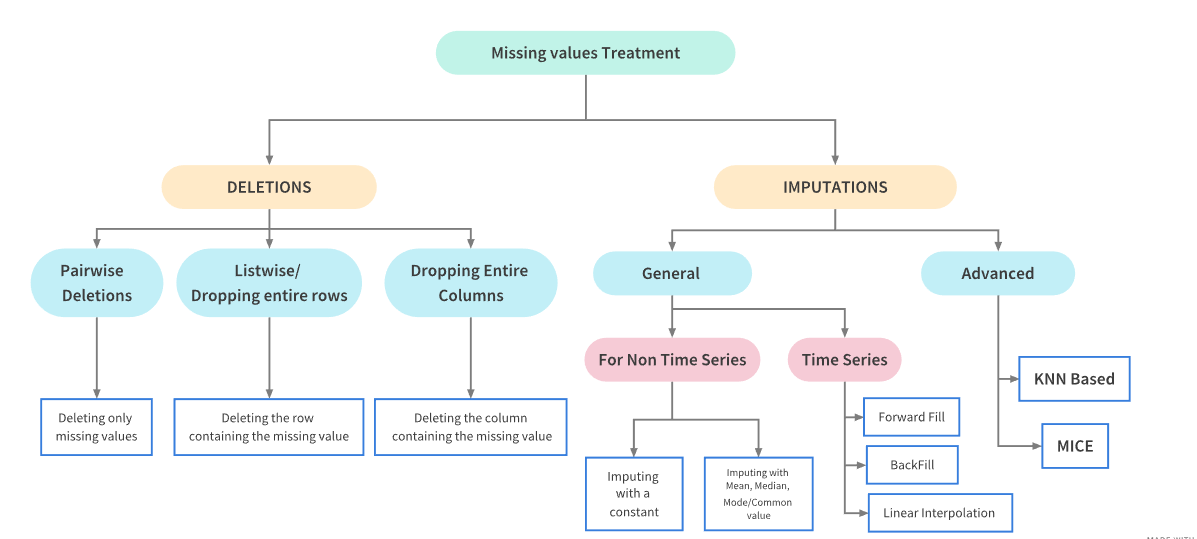

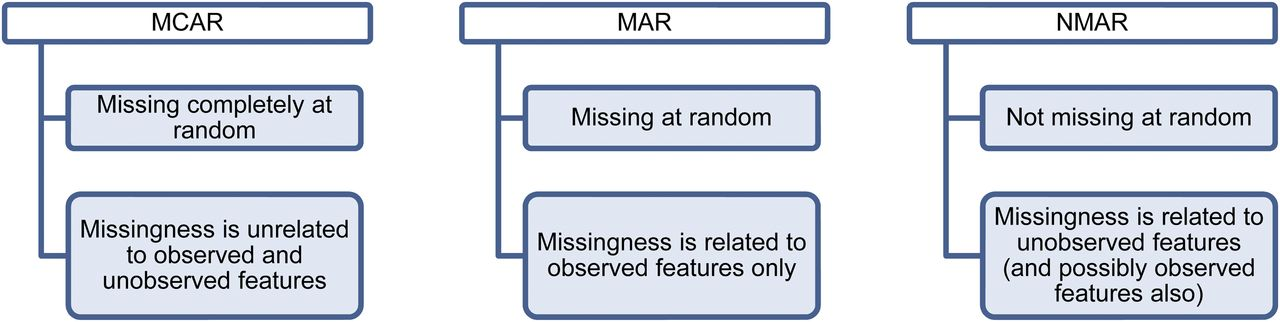


- In Real-world data is messy and often contains a lot of missing values. There could be multiple reasons for the missing values like 
 1. Data doesn't exist
 2. Data was not collected due to human error.
 3. Data was deleted accidentally.

## Objective
The objective of this case study is to detect missing values and then go over some of the methods used for imputing them.
And after imputing with an appropriate method will move to model prediction to check that is this imputing operation will play important role in model accuracy or not.


#### So here we are going to import the titanic dataset Non-Time Series problem and Air Quality Data for Time Series problem.


- It is also important to note that some algorithms like ```XGBoost``` and ```LightGBM``` can treat missing data without any preprocessing.

## 1. Data

- ```Titanic``` Dataset 
- ```Air Quality Data```  

## 2. Loading necessary libraries and datasets

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

## 3. Reading in the dataset
Reading in the Titanic Dataset.

In [2]:
train=pd.read_csv(r'C:\Users\Vivek 6666\Downloads\train.csv')
test=pd.read_csv(r'C:\Users\Vivek 6666\Downloads\test.csv')

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

# First few rows of the training dataset
train.head()

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Examining the Target column

- For each passenger in the test set, we need to create a model that predicts whether or not the passengers survived the sinking of the Titanic. 

- Hence Survived is that target column in the dataset. 

- Let's examine the distribution of the target column

In [3]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### So here:

0: is indicate that passanger did not Survive while

1: is indicate that passanger is Survived.

Clearly, there is fewer people survived the accident.

#### Since the focus of the case study is to detect and handle missing values, Let's look at a step-by-step process to manage the missing values in a dataset.

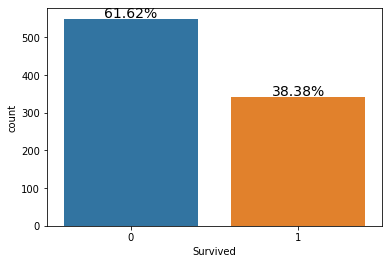

In [4]:
 s = sns.countplot(x = 'Survived',data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=14) 

## 5. Detecting Missing values

#### Detecting missing values numerically

The first step is to detect the count of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
train_missing= missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [7]:
test_missing= missing_values_table(test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


### Observations:
So as you can see Both the train and test sets have the same proportion of the missing values.

## 6. Detecting missing data visually using Missingno library
- To graphically analyze the missingness of the data, we will use a library called ```Missingno.```
- It is a package for ```graphical analysis``` of missing values. 
- To use this library, we need to import it as follows: **import missingno as msno**

<AxesSubplot:>

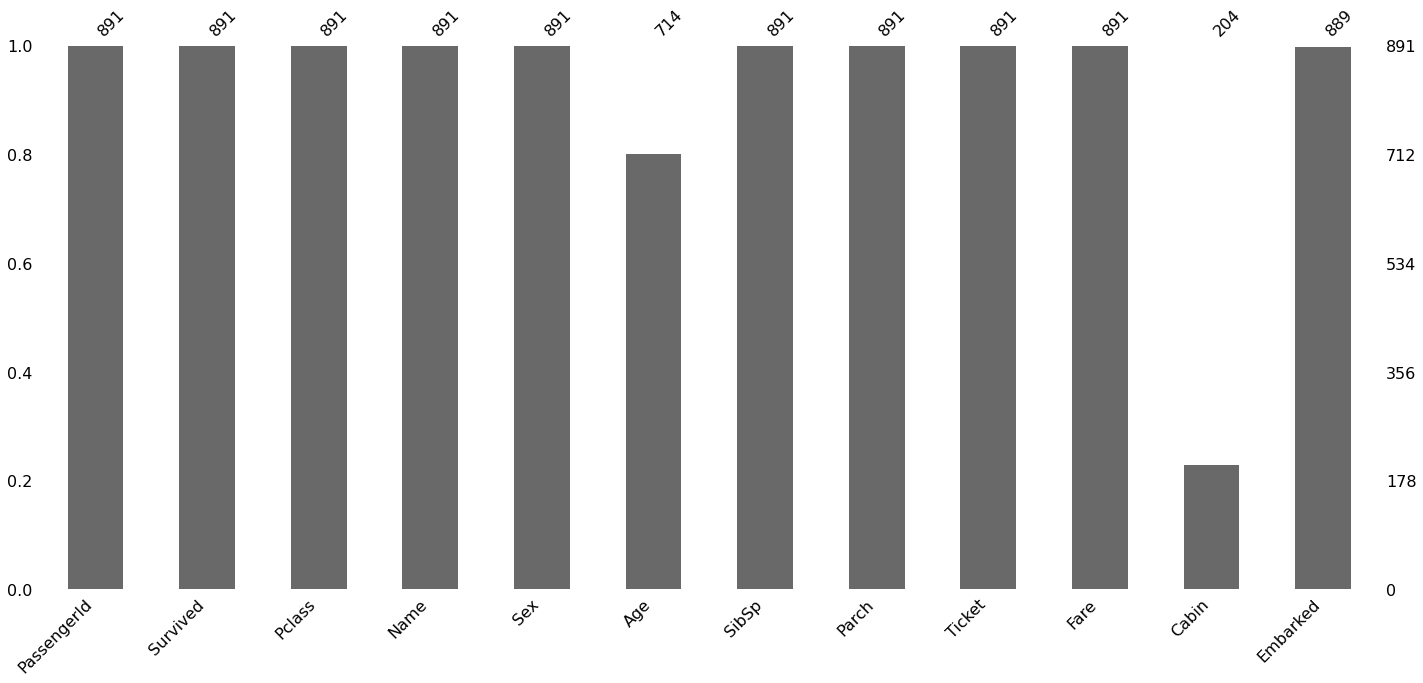

In [8]:
msno.bar(train)

### Observations: 
- This bar chart above gives a quick graphical overview of the completeness of the dataset. 
- We can see that Age, Cabin, and embarked columns have missing values.

### First, we will check the first 100 rows.

It is also possible to sample the dataset to pinpoint the exact location of the missing values. For instance let's check the first 100 rows.

<AxesSubplot:>

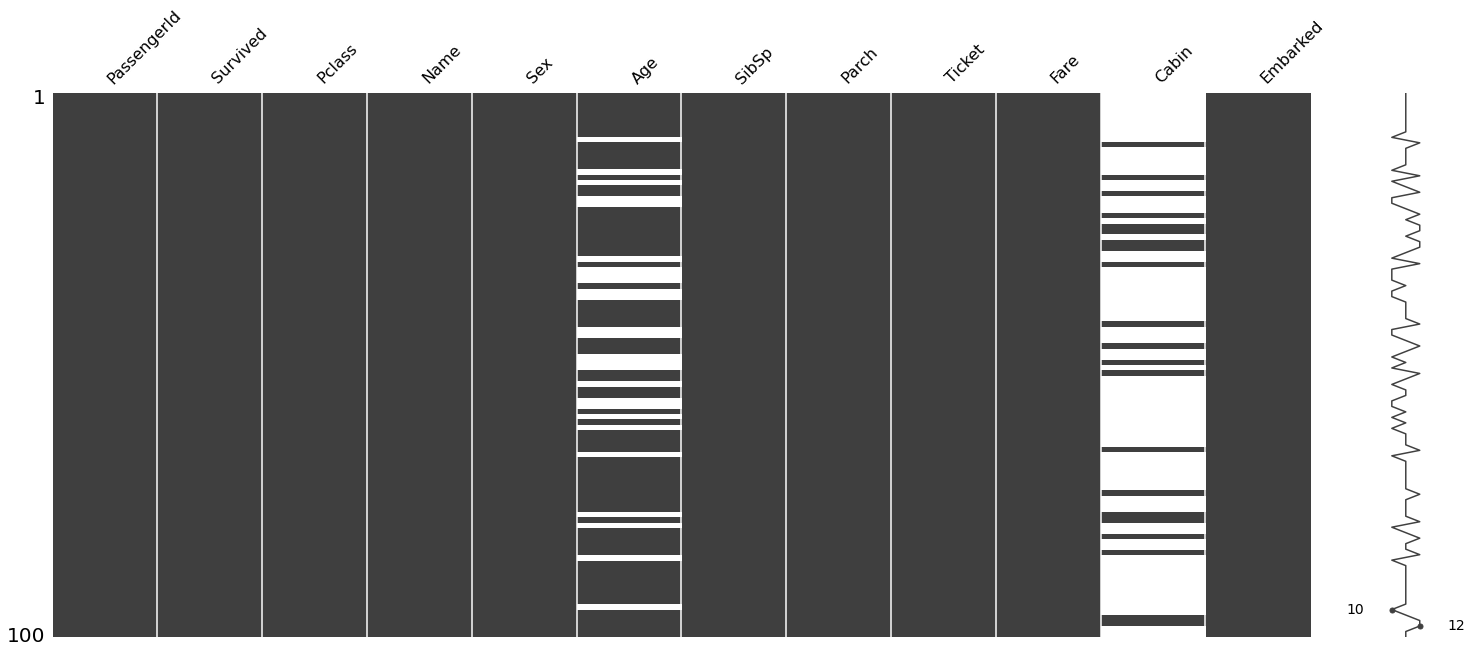

In [9]:
msno.matrix(train.sample(100))

### Observations:
The bar chart shows that the Embarked column has no nullity in the first **100** cases.

## 7. Finding Missing data using Matrix plot

The plot appears white wherever there are missing values.

<AxesSubplot:>

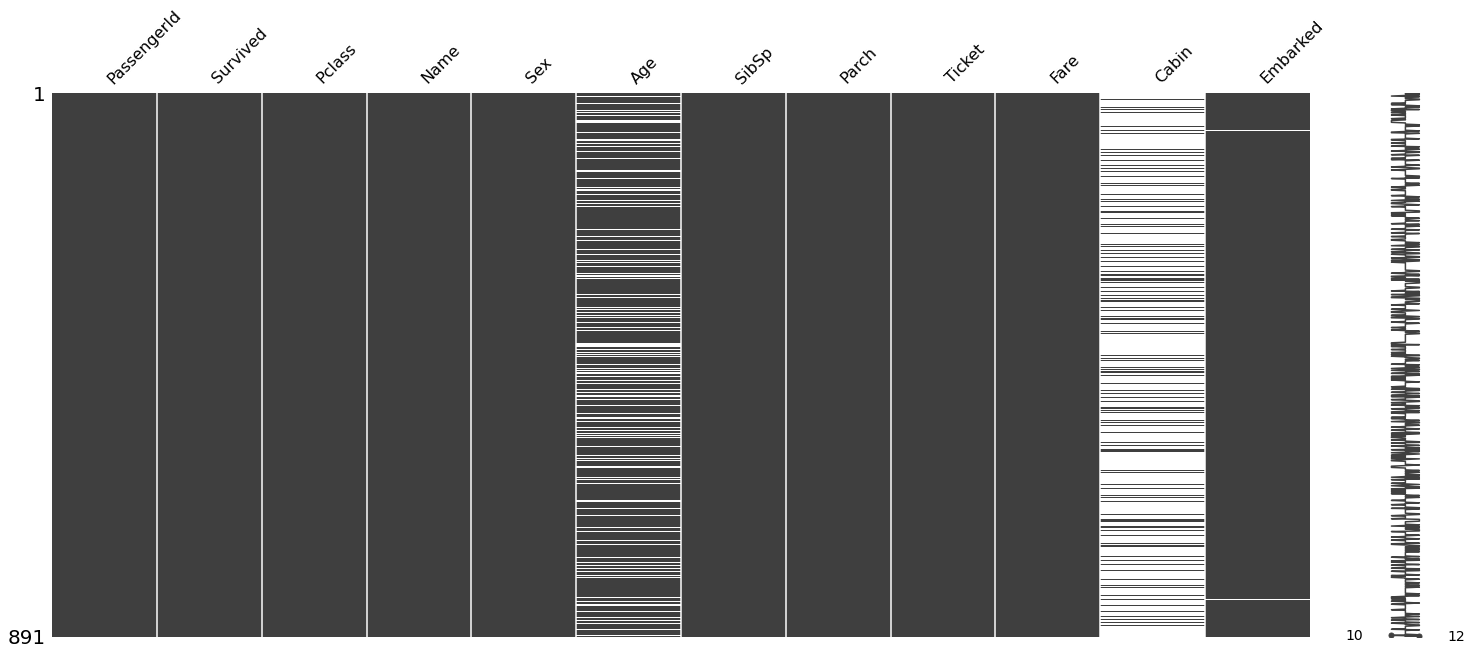

In [10]:
msno.matrix(train)

### Observations:

- For instance, in Embarked column there are only two instances of missing data, hence the two white lines are there.

- The Embarked Column has very few missing values and does not seem to be correlated with any other column, Hence, the missingness in an Embarked column can be attributed as Missing Completely at Random.

- And Both the Age and the Cabin columns have a lot of missing values. This could be a case of MAR as we cannot directly observe the reason for the missingness of data in these columns.

#### Now Let's sort the values by Age and Cabin column to see if there is a pattern in the missing values

<AxesSubplot:>

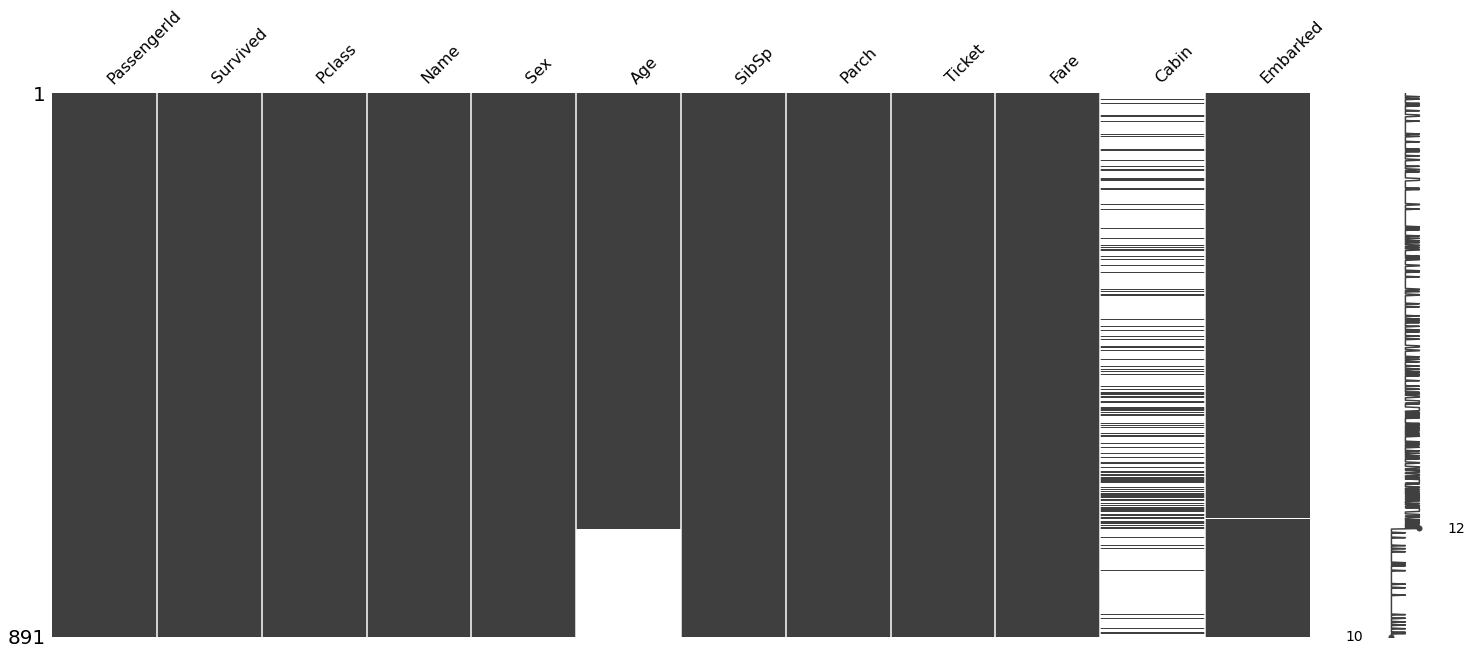

In [11]:
#sorted by Age
sorted = train.sort_values('Age')
msno.matrix(sorted)

### Observations:
    
Hence it is clear that there is no relation between the missingness in Age and Cabin column. To cement this conclusion further we can also draw a Heatmap among the different variables in the dataset.

## 8. Finding Missing data using a Heatmap

<AxesSubplot:>

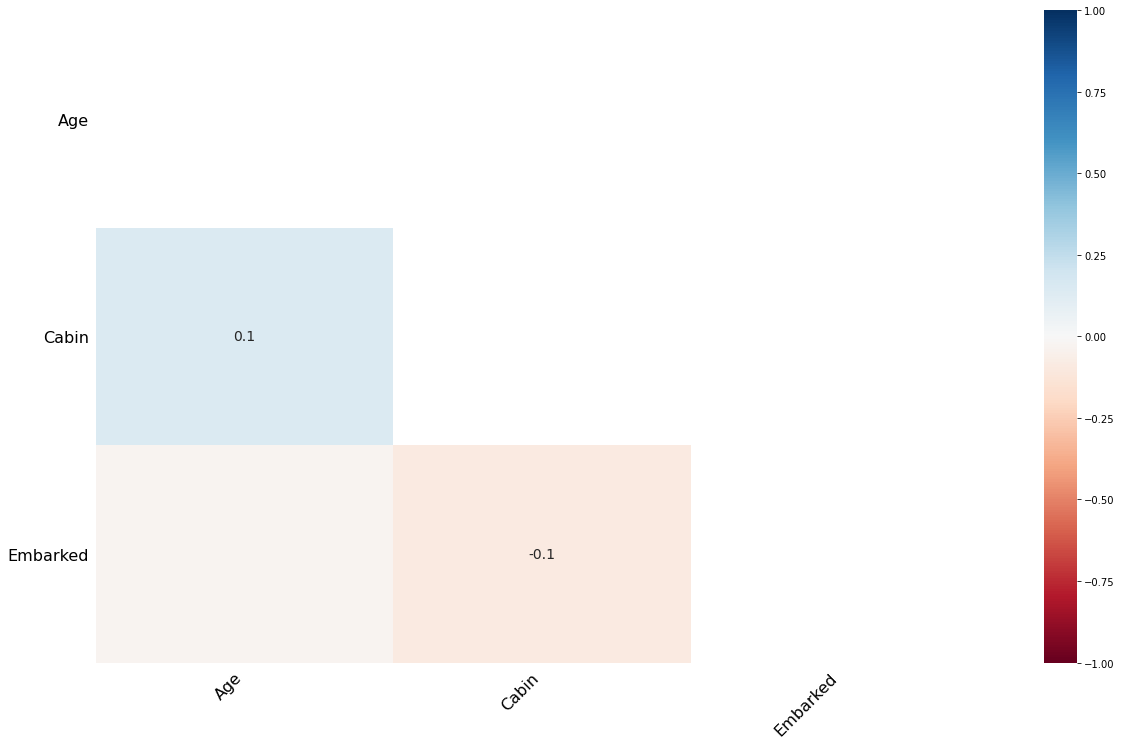

In [12]:
msno.heatmap(train)

### Observations:

As you can see The heatmap shows that there are no strong correlations between missing values of different features.

## 9. Finding Missing data using Dendrogram

- A dendrogram is a tree diagram of missingness. 
- It groups the highly correlated variables.

<AxesSubplot:>

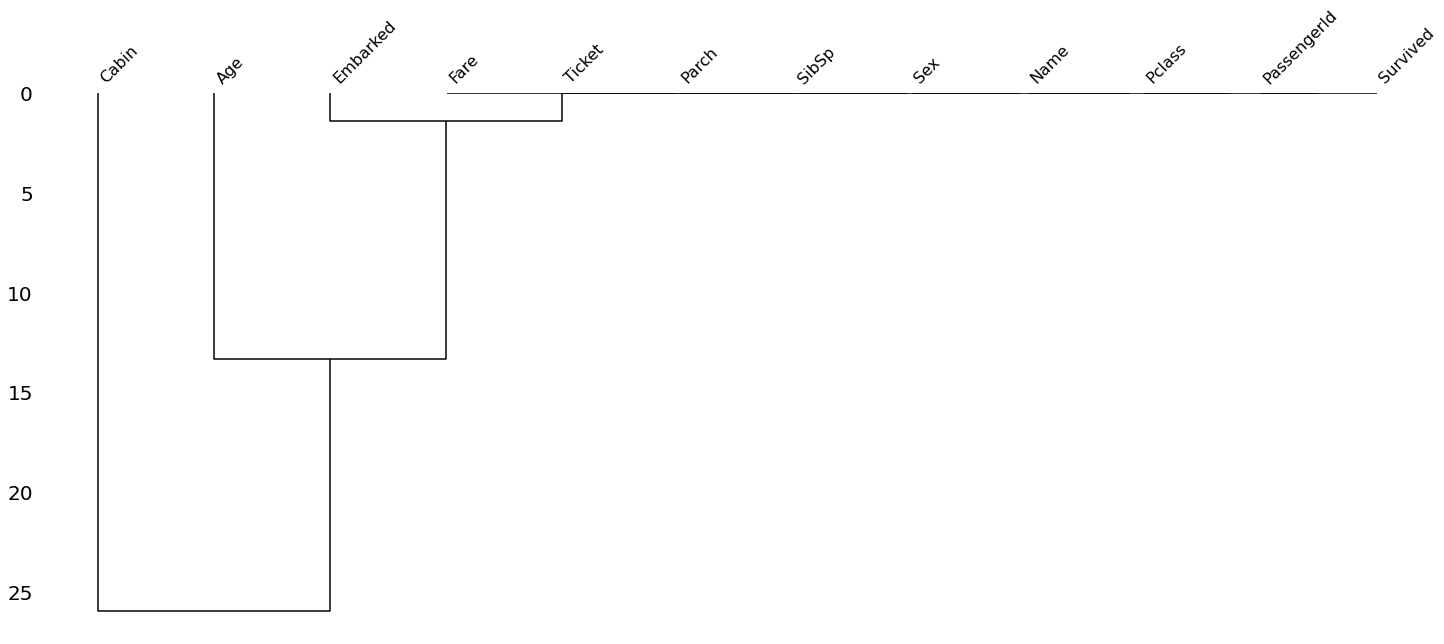

In [13]:
msno.dendrogram(train)

### Observations:

- The missingness of Embarked tends to be more similar to Age than to Cabin and so on.
- But However, in this particular case, the correlation is high since Embarked column has very few missing values.

This dataset doesn't have much missing values but if you use the same methodology on datasets having a lot of missing values, some interesting pattern will definitely emerge.

## 10. Treating Missing values

After having identified the patterns in missing values, it is important to treat them too.


Here is a flowchart which could prove handy:

### 10.1 Deletions

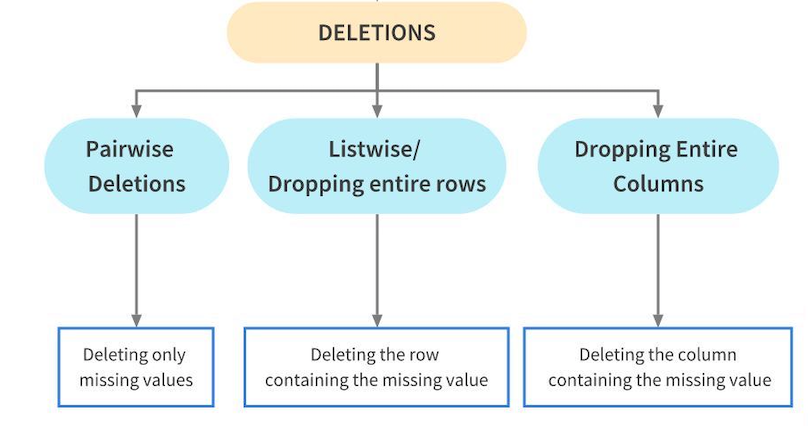

- These are the different methods to treat them.

- In the deletion method Deletion means to delete the missing values from a dataset. But this method is not recommended as it might result in loss of information from the dataset. We should only delete the missing values from a dataset if their proportion is very small.

- While in the case of Pairwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted.

- So in our case after deleting all the null values,  The Age column doesn't have any missing values. But the major disadvantage of deletion is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train_1 = train.copy()
train_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

In [16]:
#Drop rows which contains any NaN or missing value for Age column
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

0

### 10.2 Dropping complete columns

- If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. 
- However, again, it is not a good methodology to delete data

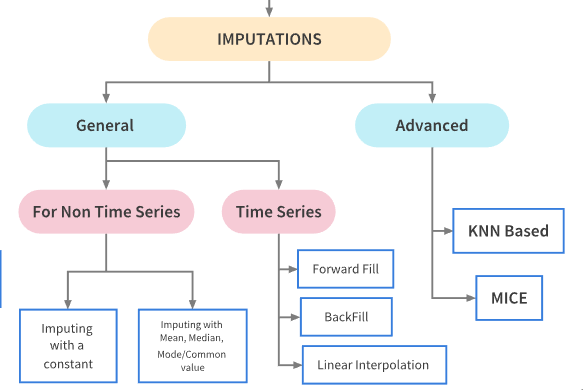


- Imputation refers to replacing missing data with substituted values.

- There are a lot of ways in which the missing values can be imputed depending upon the nature of the problem and data.

- Dependng upon the nature of the problem, imputation techniques can be broadly they can be classified as follows:

## Basic Imputation Techniques

- So here we will impute all null values with their constant value concerning that column.

- Similar way we can impute all null values with their mean, median, mode, and most frequent value.

- Over here in the strategy keyword, we have to just define the operation and the entire work is done by the SimpleImputer class library.

**For this we shall use the The SimpleImputer class from sklearn.**

In [17]:
# imputing with a constant

from sklearn.impute import SimpleImputer
train_constant = train.copy()
#setting strategy to 'constant' 
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

In [19]:
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### After imputing all NAN values with its desired operation this is how our data is a lookalike.

### 10.3 K-Nearest Neighbor Imputation

- The last and advanced technique Is the ```KNN imputer```
- This imputer utilizes the Knn method to replace the missing values in the datasets with the mean value from the parameter ```‘n_neighbors’``` nearest neighbors found in the training set.
- By default, it uses a Euclidean distance metric to impute the missing values.

#### What I mean is The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

In [20]:
train_knn = train.copy(deep=True)

In [21]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [22]:
train_knn['Age'].isnull().sum()

0

### So the Conclusion is

- There are different ways to handle missing data. Some methods such as removing the entire observation if it has a missing value or replacing the missing values with mean, median or mode values. 

- But, these methods can waste valuable data or reduce the variability of your dataset. In contrast, KNN Imputer maintains the value and variability of your datasets, and yet it is more precise and efficient than using the average values.

### 11. Imputations Techniques for Time Series Problems

So, Now let's look at ways to impute data in a typical time series problem. Tackling missing values in the time Series problem is a bit different.

#### Basic Imputation Techniques

1. ```'ffill' or 'pad'``` - Replace NaN s with last observed value

2. ```'bfill' or 'backfill'``` - Replace NaN s with next observed value

3. Linear interpolation method.

For the time series, the dataset I’ve taken is called Air Quality Data. it contains air quality data and Air Quality Index at an hourly and daily level of various stations across multiple cities in India.

In [23]:
city_day = pd.read_csv(r'C:\Users\Vivek 6666\Downloads\city_day.csv',parse_dates=True,index_col='Date')
city_day1=city_day.copy(deep=True)
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### Observations:
The dataset has a lot of missing values

In [24]:
#Missing Values
city_day_missing= missing_values_table(city_day)
city_day_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16989,60.3
PM10,11005,39.1
NH3,10121,35.9
Toluene,7715,27.4
Benzene,5386,19.1
AQI,4575,16.2
AQI_Bucket,4575,16.2
PM2.5,4552,16.2
NOx,4142,14.7
O3,3888,13.8


### Observations:
As you can see 14 columns have missing values some of the columns like Xylene and PM10 have more than 50% of the missing values.

### Let's see how we can impute these missing values.

In [25]:
# Imputation using ffill/pad
# Imputing Xylene value

city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

### 11.1 Imputing using ffill

So the first technique is forward ```ffill```

In [26]:
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

### Observations:
    
- So there are 3 missing values in the Xylene column.
- After applying the forward fill imputation We can see that all missing values have been filled with the last observed values.

#### The next is backward fill

### 11.2 Imputation using bfill

In [27]:
# Imputing AQI value

city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [28]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

### Observations:
    
- So there are 8 missing values in the index column.
- I mean air quality index.
- Now after imputing backword fill We can see that all missing values have been filled with the next observed values.

### 11.3 Imputation using Linear Interpolation method

In [29]:
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [30]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64

### Conclusion:

- Time series data has a lot of variations against time. 
- Hence, imputing using backfill and forward fill isn't the best possible solution to address the missing value problem.

A more appropriate alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

#### Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilizes non-missing values from adjacent data points to compute a value for a missing data point.

- Here the ```limit_direction="both"``` means it will imputing NAN values in forwarding and backward fill.

Both operations will be performed.

### 12. Now Let’s predict the model accuracy by using various imputation techniques.

To check that after performing desired imputation operation model accuracy is increases or not.

In [31]:
import pandas as pd
import numpy as np
#importing the dataset
df = pd.read_csv(r'C:\Users\Vivek 6666\Downloads\train.csv')

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


So before we start predicting model accuracy we will drop columns like PassengerId, Name, Age, etc. 

Because We won’t be working with all the columns in the dataset, so first we will delete these columns.

In [33]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

#### Then we will use Label Encoding or One Hot Encoding for all categorical values.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
newdf = df.copy()
updated_df_1 = df.copy()
df_1 = df.copy()

In [35]:
#splitting the data into x and y
y = df['Survived']
df.drop("Survived",axis=1,inplace=True)

### To know whether the data has missing values?

- Missing values are usually represented in the form of Nan or null or None in the dataset.

- ```df.info()``` the function can be used to give information about the dataset. 

- This will provide you with the column names along with the number of non – null values in each column.

In [36]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


- See that there are null values in the column ```Age.```

- The second way of finding whether we have null values in the data is by using the isnull() function.

- The next operation is to know whether the data has missing values?

In [37]:
print(df.isnull().sum())

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64


### Observations:
So as we can see that all the null values in the dataset are in the column – Age.

### Logistic regression.

Let’s try fitting the data using logistic regression.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(X_train,y_train)

-  So as usual the logistic regression model does not work as we have NaN values in the dataset. 

- Only some of the machine learning algorithms can work with missing data like KNN, which will ignore the values with Nan values.

#### Now let’s look at the different methods that we can use to deal with the missing data.

### 12.1 Deleting the column with missing data

In this case, first, we will delete the column, Age, and then fit the model and check for accuracy.

But this is an extreme case and should only be used when there are many null values in the column.

In [38]:
updated_df = df.dropna(axis=1)

In [39]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 31.4 KB


In [65]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7611940298507462


### Observations:
    
- As we can see that we have achieved an accuracy of ```76%.```

- And The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values.

- It Should only be used if there are too many null values.

### 12.2 Deleting the row with missing data

If there is a certain row with missing data, then we will delete the entire row with all the features in that row.

And I want to point out one this which is 
- axis=1 is used to drop the column with `NaN` values.
- axis=0 is used to drop the row with `NaN` values.

In [66]:
updated_df = newdf.dropna(axis=0)

In [67]:
y1 = updated_df["Survived"]
updated_df.drop("Survived",axis=1,inplace=True)

D:\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int32  
 2   Age     714 non-null    float64
 3   SibSp   714 non-null    int64  
 4   Parch   714 non-null    int64  
 5   Fare    714 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 36.3 KB


In [72]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.8186046511627907


### Observations:
In this case, we have achieved better accuracy than before. This is maybe because the column Age contains more valuable information than we expected.

### 12.3 Filling the Missing Values – Imputation

- The possible ways to do this are:

- Filling the missing data with the mean or median value if it’s a numerical variable.
- Filling the missing data with mode if it’s a categorical value.
- Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
- Filling the categorical value with a new type for the missing values.

**You can use the fillna() function to fill the null values in the dataset.**

In [73]:
updated_df_1['Age']=updated_df_1['Age'].fillna(updated_df_1['Age'].mean())
updated_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [74]:
y1 = updated_df_1['Survived']
updated_df_1.drop("Survived",axis=1,inplace=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df_1,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7723880597014925


### Observations:

- The accuracy value comes out to be `77%` which is a reduction over the previous case.

- This will not happen in general, in this case, it means that the `mean` has not filled the null value properly.

### 12.4 Filling with a Regression Model

- In this case, the null values in one column are filled by fitting a regression model using other columns.

- I mean the regression model will contain all the columns except Age in X and Age in Y.

- Then after filling the values in the Age column, we will use logistic regression to calculate accuracy.

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df_1.head()
testdf = df_1[df_1['Age'].isnull()==True]
traindf = df_1[df_1['Age'].isnull()==False]
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Age']= pred

D:\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-75-d2d996086e0c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test

In [76]:
traindf['Age']=y

<ipython-input-76-09294d128ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Age']=y


In [77]:
y = traindf['Survived']
traindf.drop("Survived",axis=1,inplace=True)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(traindf,y)

D:\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


LogisticRegression()

In [78]:
y_test = testdf['Survived']
testdf.drop("Survived",axis=1,inplace=True)
pred = lr.predict(testdf)

D:\Anaconda3-2020.11-Windows-x86_64\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
print(metrics.accuracy_score(pred,y_test))

0.8361581920903954


### Observations:

- See that this model produces more accuracy than the previous model as we are using a specific regression model for filling the missing values.

- We can also use models  KNN for filling the missing values. But sometimes, using models for imputation can result in overfitting the data.

- And Imputing missing values using the regression model allowed us to improve our model compared to dropping those columns.

## Conclusion

Well, there is no single best way to handle missing values. We have individual needs to experiment with different methods and then decide which method is best for a particular problem.